In [19]:
import pyrealsense2 as rs
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as R
import copy

In [2]:
np.set_printoptions(precision=4, suppress=True)

# Saving all frames 

In [3]:
# data filenames
d435_filename = 'data/D435.bag'
t265_filename = 'data/T265.bag'

### T265

In [4]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file(t265_filename)
cfg.enable_stream(rs.stream.pose)
pipe = rs.pipeline()
profile = pipe.start(cfg)

t265_data_list = []
t265_time_list = []
first_timestamp = None
while(True):

    frames = pipe.wait_for_frames()
    pose = frames.get_pose_frame()
    
    if pose:
        if pose.get_timestamp() == first_timestamp:
            print('reached the first frame - reading bag file completed')
            break
        if first_timestamp is None:
            first_timestamp = pose.get_timestamp()
            print('first_timestamp',first_timestamp)
        print('current-first',pose.get_timestamp()-first_timestamp)
        t265_data_list.append(pose.get_pose_data())
        t265_time_list.append(pose.get_timestamp())

pipe.stop()

first_timestamp 1585059273040.0645
current-first 0.0
current-first 4.9990234375
current-first 9.998046875
current-first 14.9970703125
current-first 19.9970703125
current-first 24.99609375
current-first 29.9951171875
current-first 34.993896484375
current-first 39.9931640625
current-first 44.9931640625
current-first 49.991943359375
current-first 54.9912109375
current-first 59.989990234375
current-first 64.989013671875
current-first 69.9892578125
current-first 74.988037109375
current-first 79.987060546875
current-first 84.986083984375
current-first 89.985107421875
current-first 94.98388671875
current-first 99.983154296875
current-first 104.983154296875
current-first 109.98193359375
current-first 114.981201171875
current-first 119.97998046875
current-first 124.97998046875
current-first 129.97900390625
current-first 134.97802734375
current-first 139.97705078125
current-first 144.975830078125
current-first 149.97509765625
current-first 154.97509765625
current-first 159.973876953125
current-f

current-first 1439.767822265625
current-first 1444.766845703125
current-first 1449.765869140625
current-first 1454.764892578125
current-first 1459.764892578125
current-first 1464.763916015625
current-first 1469.762939453125
current-first 1474.76171875
current-first 1479.80078125
current-first 1484.7998046875
current-first 1489.798828125
current-first 1494.7978515625
current-first 1499.796875
current-first 1504.795654296875
current-first 1509.794921875
current-first 1514.794921875
current-first 1519.793701171875
current-first 1524.79296875
current-first 1529.791748046875
current-first 1534.790771484375
current-first 1539.791015625
current-first 1544.789794921875
current-first 1549.788818359375
current-first 1554.787841796875
current-first 1559.786865234375
current-first 1564.786865234375
current-first 1569.785888671875
current-first 1574.784912109375
current-first 1579.78369140625
current-first 1584.782958984375
current-first 1589.782958984375
current-first 1594.78173828125
current-firs

current-first 2869.595703125
current-first 2874.594970703125
current-first 2879.59375
current-first 2884.5927734375
current-first 2889.591796875
current-first 2894.591796875
current-first 2899.5908203125
current-first 2904.58984375
current-first 2909.5888671875
current-first 2914.587646484375
current-first 2919.587890625
current-first 2924.5869140625
current-first 2929.585693359375
current-first 2934.5849609375
current-first 2939.583740234375
current-first 2944.583740234375
current-first 2949.5830078125
current-first 2954.581787109375
current-first 2959.580810546875
current-first 2964.579833984375
current-first 2969.579833984375
current-first 2974.578857421875
current-first 2979.549072265625
current-first 2984.5478515625
current-first 2989.546875
current-first 2994.5458984375
current-first 2999.5458984375
current-first 3004.544921875
current-first 3009.5439453125
current-first 3014.54296875
current-first 3019.541748046875
current-first 3024.541015625
current-first 3029.541015625
curren

current-first 4304.287841796875
current-first 4309.28662109375
current-first 4314.285888671875
current-first 4319.284912109375
current-first 4324.28466796875
current-first 4329.28369140625
current-first 4334.28271484375
current-first 4339.28173828125
current-first 4344.281005859375
current-first 4349.28076171875
current-first 4354.27978515625
current-first 4359.278564453125
current-first 4364.27783203125
current-first 4369.276611328125
current-first 4374.276611328125
current-first 4379.27587890625
current-first 4384.274658203125
current-first 4389.273681640625
current-first 4394.272705078125
current-first 4399.272705078125
current-first 4404.271728515625
current-first 4409.270751953125
current-first 4414.269775390625
current-first 4419.2685546875
current-first 4424.268798828125
current-first 4429.267822265625
current-first 4434.2666015625
current-first 4439.265869140625
current-first 4444.2646484375
current-first 4449.2646484375
current-first 4454.263916015625
current-first 4459.262695

current-first 5734.134521484375
current-first 5739.133544921875
current-first 5744.132568359375
current-first 5749.132568359375
current-first 5754.131591796875
current-first 5759.130615234375
current-first 5764.129638671875
current-first 5769.12841796875
current-first 5774.128662109375
current-first 5779.127685546875
current-first 5784.12646484375
current-first 5789.125732421875
current-first 5794.125732421875
current-first 5799.12451171875
current-first 5804.12353515625
current-first 5809.12255859375
current-first 5814.12158203125
current-first 5819.12060546875
current-first 5824.12060546875
current-first 5829.11962890625
current-first 5834.118408203125
current-first 5839.11767578125
current-first 5844.11767578125
current-first 5849.116455078125
current-first 5854.11572265625
current-first 5859.114501953125
current-first 5864.113525390625
current-first 5869.11376953125
current-first 5874.112548828125
current-first 5879.111572265625
current-first 5884.110595703125
current-first 5889.10

current-first 7168.926513671875
current-first 7173.925537109375
current-first 7178.924560546875
current-first 7183.923583984375
current-first 7188.92333984375
current-first 7193.922607421875
current-first 7198.921630859375
current-first 7203.92041015625
current-first 7208.919677734375
current-first 7213.91943359375
current-first 7218.91845703125
current-first 7223.917724609375
current-first 7228.91650390625
current-first 7233.91552734375
current-first 7238.91552734375
current-first 7243.91455078125
current-first 7248.91357421875
current-first 7253.91259765625
current-first 7258.91259765625
current-first 7263.911376953125
current-first 7268.91064453125
current-first 7273.90966796875
current-first 7278.908447265625
current-first 7283.90869140625
current-first 7288.907470703125
current-first 7293.906494140625
current-first 7298.90576171875
current-first 7303.904541015625
current-first 7308.904541015625
current-first 7313.903564453125
current-first 7318.902587890625
current-first 7323.9016

current-first 8608.75
current-first 8613.748779296875
current-first 8618.747802734375
current-first 8623.746826171875
current-first 8628.746826171875
current-first 8633.74560546875
current-first 8638.744873046875
current-first 8643.743896484375
current-first 8648.74267578125
current-first 8653.742919921875
current-first 8658.74169921875
current-first 8663.74072265625
current-first 8668.739990234375
current-first 8673.73876953125
current-first 8678.73876953125
current-first 8683.737548828125
current-first 8688.73681640625
current-first 8693.73583984375
current-first 8698.735595703125
current-first 8703.73486328125
current-first 8708.733642578125
current-first 8713.732666015625
current-first 8718.73193359375
current-first 8723.731689453125
current-first 8728.730712890625
current-first 8733.729736328125
current-first 8738.728759765625
current-first 8743.727783203125
current-first 8748.727783203125
current-first 8753.726806640625
current-first 8758.7255859375
current-first 8763.72485351562

current-first 10043.453857421875
current-first 10048.45263671875
current-first 10053.45166015625
current-first 10058.45068359375
current-first 10063.44970703125
current-first 10068.44970703125
current-first 10073.44873046875
current-first 10078.44775390625
current-first 10083.446533203125
current-first 10088.44677734375
current-first 10093.44580078125
current-first 10098.444580078125
current-first 10103.44384765625
current-first 10108.442626953125
current-first 10113.442626953125
current-first 10118.44189453125
current-first 10123.440673828125
current-first 10128.439697265625
current-first 10133.438720703125
current-first 10138.438720703125
current-first 10143.437744140625
current-first 10148.4365234375
current-first 10153.435791015625
current-first 10158.4345703125
current-first 10163.4345703125
current-first 10168.433837890625
current-first 10173.4326171875
current-first 10178.431640625
current-first 10183.431640625
current-first 10188.4306640625
current-first 10193.429443359375
curr

current-first 11478.311767578125
current-first 11483.311767578125
current-first 11488.310546875
current-first 11493.309814453125
current-first 11498.30859375
current-first 11503.3076171875
current-first 11508.287353515625
current-first 11513.287109375
current-first 11518.2861328125
current-first 11523.285400390625
current-first 11528.28515625
current-first 11533.2841796875
current-first 11538.283203125
current-first 11543.2822265625
current-first 11548.28125
current-first 11553.281005859375
current-first 11558.2802734375
current-first 11563.279052734375
current-first 11568.278076171875
current-first 11573.2783203125
current-first 11578.277099609375
current-first 11583.276123046875
current-first 11588.275146484375
current-first 11593.274169921875
current-first 11598.274169921875
current-first 11603.273193359375
current-first 11608.272216796875
current-first 11613.27099609375
current-first 11618.270263671875
current-first 11623.270263671875
current-first 11628.26904296875
current-first 1

current-first 12913.08544921875
current-first 12918.08544921875
current-first 12923.084228515625
current-first 12928.083251953125
current-first 12933.08251953125
current-first 12938.081298828125
current-first 12943.081298828125
current-first 12948.080322265625
current-first 12953.079345703125
current-first 12958.078369140625
current-first 12963.077392578125
current-first 12968.077392578125
current-first 12973.076171875
current-first 12978.075439453125
current-first 12983.074462890625
current-first 12988.0732421875
current-first 12993.073486328125
current-first 12998.072265625
current-first 13003.0712890625
current-first 13008.060791015625
current-first 13013.0595703125
current-first 13018.0595703125
current-first 13023.058837890625
current-first 13028.0576171875
current-first 13033.056640625
current-first 13038.056884765625
current-first 13043.0556640625
current-first 13048.0546875
current-first 13053.0537109375
current-first 13058.052734375
current-first 13063.052490234375
current-fir

current-first 14342.92578125
current-first 14347.92578125
current-first 14352.925048828125
current-first 14357.923828125
current-first 14362.9228515625
current-first 14367.923095703125
current-first 14372.921875
current-first 14377.9208984375
current-first 14382.919921875
current-first 14387.9189453125
current-first 14392.9189453125
current-first 14397.91796875
current-first 14402.9169921875
current-first 14407.915771484375
current-first 14412.915771484375
current-first 14417.9150390625
current-first 14422.913818359375
current-first 14427.912841796875
current-first 14432.911865234375
current-first 14437.911865234375
current-first 14442.910888671875
current-first 14447.909912109375
current-first 14452.908935546875
current-first 14457.90771484375
current-first 14462.907958984375
current-first 14467.906982421875
current-first 14472.90576171875
current-first 14477.905029296875
current-first 14482.90478515625
current-first 14487.90380859375
current-first 14492.903076171875
current-first 144

current-first 15772.652587890625
current-first 15777.65283203125
current-first 15782.651611328125
current-first 15787.650634765625
current-first 15792.64990234375
current-first 15797.649658203125
current-first 15802.648681640625
current-first 15807.647705078125
current-first 15812.646728515625
current-first 15817.6455078125
current-first 15822.645751953125
current-first 15827.644775390625
current-first 15832.6435546875
current-first 15837.642822265625
current-first 15842.642822265625
current-first 15847.6416015625
current-first 15852.640869140625
current-first 15857.6396484375
current-first 15862.638671875
current-first 15867.638916015625
current-first 15872.6376953125
current-first 15877.63671875
current-first 15882.6357421875
current-first 15887.6357421875
current-first 15892.634765625
current-first 15897.633544921875
current-first 15902.6328125
current-first 15907.6328125
current-first 15912.631591796875
current-first 15917.630859375
current-first 15922.629638671875
current-first 15

current-first 17217.4658203125
current-first 17222.46484375
current-first 17227.463623046875
current-first 17232.4638671875
current-first 17237.462890625
current-first 17242.461669921875
current-first 17247.4609375
current-first 17252.4609375
current-first 17257.459716796875
current-first 17262.458984375
current-first 17267.457763671875
current-first 17272.456787109375
current-first 17277.45703125
current-first 17282.455810546875
current-first 17287.454833984375
current-first 17292.453857421875
current-first 17297.452880859375
current-first 17302.452880859375
current-first 17307.451904296875
current-first 17312.450927734375
current-first 17317.44970703125
current-first 17322.44970703125
current-first 17327.448974609375
current-first 17332.44775390625
current-first 17337.44677734375
current-first 17342.447021484375
current-first 17347.44580078125
current-first 17352.44482421875
current-first 17357.44384765625
current-first 17362.44287109375
current-first 17367.442626953125
current-first

current-first 18647.249267578125
current-first 18652.249267578125
current-first 18657.248291015625
current-first 18662.247314453125
current-first 18667.24609375
current-first 18672.246337890625
current-first 18677.245361328125
current-first 18682.244140625
current-first 18687.243408203125
current-first 18692.2431640625
current-first 18697.2421875
current-first 18702.241455078125
current-first 18707.240234375
current-first 18712.2392578125
current-first 18717.23828125
current-first 18722.23828125
current-first 18727.237060546875
current-first 18732.236083984375
current-first 18737.2353515625
current-first 18742.235107421875
current-first 18747.234130859375
current-first 18752.233154296875
current-first 18757.232177734375
current-first 18762.232177734375
current-first 18767.231201171875
current-first 18772.230224609375
current-first 18777.22900390625
current-first 18782.229248046875
current-first 18787.228271484375
current-first 18792.22705078125
current-first 18797.226318359375
current-

current-first 20072.0673828125
current-first 20077.06640625
current-first 20082.066162109375
current-first 20087.0654296875
current-first 20092.064208984375
current-first 20097.0634765625
current-first 20102.0634765625
current-first 20107.062255859375
current-first 20112.061279296875
current-first 20117.060302734375
current-first 20122.059326171875
current-first 20127.059326171875
current-first 20132.058349609375
current-first 20137.057373046875
current-first 20142.05615234375
current-first 20147.056396484375
current-first 20152.055419921875
current-first 20157.05419921875
current-first 20162.053466796875
current-first 20167.053466796875
current-first 20172.05224609375
current-first 20177.051513671875
current-first 20182.05029296875
current-first 20187.04931640625
current-first 20192.049560546875
current-first 20197.04833984375
current-first 20202.04736328125
current-first 20207.04638671875
current-first 20212.04638671875
current-first 20217.04541015625
current-first 20222.04443359375


current-first 21506.88232421875
current-first 21511.882568359375
current-first 21516.88134765625
current-first 21521.88037109375
current-first 21526.879638671875
current-first 21531.87939453125
current-first 21536.87841796875
current-first 21541.87744140625
current-first 21546.825927734375
current-first 21551.824951171875
current-first 21556.8251953125
current-first 21561.823974609375
current-first 21566.822998046875
current-first 21571.822021484375
current-first 21576.822021484375
current-first 21581.821044921875
current-first 21586.81982421875
current-first 21591.819091796875
current-first 21596.81787109375
current-first 21601.81787109375
current-first 21606.817138671875
current-first 21611.81591796875
current-first 21616.81494140625
current-first 21621.815185546875
current-first 21626.81396484375
current-first 21631.81298828125
current-first 21636.81201171875
current-first 21641.81103515625
current-first 21646.81103515625
current-first 21651.81005859375
current-first 21656.809082031

current-first 22936.630126953125
current-first 22941.629150390625
current-first 22946.628173828125
current-first 22951.626953125
current-first 22956.626220703125
current-first 22961.626220703125
current-first 22966.625
current-first 22971.624267578125
current-first 22976.623046875
current-first 22981.623046875
current-first 22986.622314453125
current-first 22991.62109375
current-first 22996.6201171875
current-first 23001.619140625
current-first 23006.619140625
current-first 23011.6181640625
current-first 23016.6171875
current-first 23021.6162109375
current-first 23026.6162109375
current-first 23031.615234375
current-first 23036.6142578125
current-first 23041.613037109375
current-first 23046.613037109375
current-first 23051.646728515625
current-first 23056.645751953125
current-first 23061.644775390625
current-first 23066.644775390625
current-first 23071.643798828125
current-first 23076.642578125
current-first 23081.641845703125
current-first 23086.640625
current-first 23091.640625
curre

current-first 24366.381103515625
current-first 24371.38134765625
current-first 24376.380126953125
current-first 24381.379150390625
current-first 24386.37841796875
current-first 24391.378173828125
current-first 24396.377197265625
current-first 24401.376220703125
current-first 24406.376220703125
current-first 24411.375244140625
current-first 24416.374267578125
current-first 24421.373291015625
current-first 24426.3720703125
current-first 24431.371337890625
current-first 24436.371337890625
current-first 24441.3701171875
current-first 24446.369384765625
current-first 24451.3681640625
current-first 24456.3681640625
current-first 24461.367431640625
current-first 24466.3662109375
current-first 24471.365234375
current-first 24476.365478515625
current-first 24481.3642578125
current-first 24486.36328125
current-first 24491.3623046875
current-first 24496.3623046875
current-first 24501.361328125
current-first 24506.360107421875
current-first 24511.359375
current-first 24516.358154296875
current-fir

current-first 25806.197998046875
current-first 25811.197998046875
current-first 25816.197265625
current-first 25821.196044921875
current-first 25826.195068359375
current-first 25831.1953125
current-first 25836.194091796875
current-first 25841.193115234375
current-first 25846.192138671875
current-first 25851.192138671875
current-first 25856.19091796875
current-first 25861.190185546875
current-first 25866.189208984375
current-first 25871.18896484375
current-first 25876.188232421875
current-first 25881.18701171875
current-first 25886.18603515625
current-first 25891.185302734375
current-first 25896.18505859375
current-first 25901.18408203125
current-first 25906.18310546875
current-first 25911.18212890625
current-first 25916.18212890625
current-first 25921.180908203125
current-first 25926.18017578125
current-first 25931.178955078125
current-first 25936.178955078125
current-first 25941.17822265625
current-first 25946.177001953125
current-first 25951.176025390625
current-first 25956.175048828

current-first 27241.001708984375
current-first 27246.0009765625
current-first 27250.999755859375
current-first 27255.998779296875
current-first 27260.9990234375
current-first 27265.997802734375
current-first 27270.996826171875
current-first 27275.995849609375
current-first 27280.995849609375
current-first 27285.994873046875
current-first 27290.993896484375
current-first 27295.992919921875
current-first 27300.99169921875
current-first 27305.99169921875
current-first 27310.990966796875
current-first 27315.98974609375
current-first 27320.98974609375
current-first 27325.989013671875
current-first 27330.98779296875
current-first 27335.98681640625
current-first 27340.98583984375
current-first 27345.98583984375
current-first 27350.98486328125
current-first 27355.98388671875
current-first 27360.98291015625
current-first 27365.982666015625
current-first 27370.98193359375
current-first 27375.98095703125
current-first 27380.979736328125
current-first 27385.97998046875
current-first 27390.97875976

current-first 28675.741455078125
current-first 28680.741455078125
current-first 28685.740234375
current-first 28690.739501953125
current-first 28695.738525390625
current-first 28700.73828125
current-first 28705.7373046875
current-first 28710.736328125
current-first 28715.7353515625
current-first 28720.734375
current-first 28725.734375
current-first 28730.7333984375
current-first 28735.732177734375
current-first 28740.7314453125
current-first 28745.7314453125
current-first 28750.730224609375
current-first 28755.7294921875
current-first 28760.728271484375
current-first 28765.728271484375
current-first 28770.7275390625
current-first 28775.726318359375
current-first 28780.725341796875
current-first 28785.724365234375
current-first 28790.724365234375
current-first 28795.723388671875
current-first 28800.722412109375
current-first 28805.721435546875
current-first 28810.721435546875
current-first 28815.720458984375
current-first 28820.719482421875
current-first 28825.71826171875
current-first 

current-first 30110.60791015625
current-first 30115.60791015625
current-first 30120.606689453125
current-first 30125.60595703125
current-first 30130.60498046875
current-first 30135.604736328125
current-first 30140.60400390625
current-first 30145.602783203125
current-first 30150.601806640625
current-first 30155.60205078125
current-first 30160.600830078125
current-first 30165.599853515625
current-first 30170.598876953125
current-first 30175.597900390625
current-first 30180.597900390625
current-first 30185.596923828125
current-first 30190.595947265625
current-first 30195.595947265625
current-first 30200.594970703125
current-first 30205.593994140625
current-first 30210.5927734375
current-first 30215.592041015625
current-first 30220.592041015625
current-first 30225.5908203125
current-first 30230.58984375
current-first 30235.5888671875
current-first 30240.5888671875
current-first 30245.587890625
current-first 30250.5869140625
current-first 30255.5859375
current-first 30260.585693359375
curre

In [4]:
len(t265_time_list)

6135

### D435i

In [52]:
# Setup:
cfg = rs.config()
cfg.enable_device_from_file(d435_filename)
cfg.enable_stream(rs.stream.depth, 848, 480, rs.format.z16, 30)
pipe = rs.pipeline()
profile = pipe.start(cfg)

d435_data_list = []
d435_time_list = []
# a = np.array([])
# l = []
first_timestamp = None
counter = 0
while(True):

    frames = pipe.wait_for_frames()
    depth_frame = frames.get_depth_frame()
#     print('\ndepth_frame.get_timestamp()',depth_frame.get_timestamp())
    
    if depth_frame.get_timestamp() == first_timestamp:
        print('reached the first frame - reading bag file completed')
        print('timestamp',depth_frame.get_timestamp())
        break
    if first_timestamp is None:
        first_timestamp = depth_frame.get_timestamp()
        print('first_timestamp',first_timestamp)
    print('current-first',depth_frame.get_timestamp()-first_timestamp)
    
    
    
    # to do it first go and find timestampsmof key frames
    if depth_frame.get_timestamp() == 1585059293016.778:
        depth_frame1 = depth_frame
    if depth_frame.get_timestamp() == 1585059293549.9937:
        depth_frame2 = depth_frame
    
    
#     depth_image = np.asanyarray(depth_frame.get_data())
#     depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
#     cv2.imshow('D435 Depth Frame', depth_image)
#     cv2.waitKey(1)
    
#     counter+=1
#     if counter%30==0:
#         a = np.hstack((a, depth_frame))
#         l.append(depth_frame)
    
    d435_data_list.append(np.asanyarray(depth_frame.get_data()).copy())
    d435_time_list.append(depth_frame.get_timestamp())

cv2.destroyAllWindows()
pipe.stop()

first_timestamp 1585059272738.613
current-first 0.0
current-first 32.364013671875
current-first 65.6904296875
current-first 98.64453125
current-first 131.9052734375
current-first 165.260009765625
current-first 198.619384765625
current-first 231.972412109375
current-first 265.320556640625
current-first 298.669921875
current-first 332.087646484375
current-first 365.589111328125
current-first 398.846923828125
current-first 432.1474609375
current-first 465.772216796875
current-first 498.96435546875
current-first 532.234375
current-first 565.82763671875
current-first 598.99462890625
current-first 632.35302734375
current-first 665.62646484375
current-first 698.97509765625
current-first 732.40380859375
current-first 765.72802734375
current-first 799.047119140625
current-first 832.42724609375
current-first 865.82275390625
current-first 899.141357421875
current-first 932.950927734375
current-first 966.539306640625
current-first 999.246826171875
current-first 1032.65673828125
current-first 1065.

current-first 8870.922607421875
current-first 8904.041259765625
current-first 8937.414794921875
current-first 8970.74365234375
current-first 9004.131103515625
current-first 9037.5234375
current-first 9070.91943359375
current-first 9104.188720703125
current-first 9137.487548828125
current-first 9170.879638671875
current-first 9204.4130859375
current-first 9237.685546875
current-first 9270.93994140625
current-first 9304.329833984375
current-first 9337.723388671875
current-first 9371.021240234375
current-first 9404.494873046875
current-first 9437.6923828125
current-first 9471.15478515625
current-first 9504.37451171875
current-first 9537.784423828125
current-first 9571.24609375
current-first 9604.480224609375
current-first 9637.7802734375
current-first 9671.228515625
current-first 9704.627197265625
current-first 9737.8681640625
current-first 9771.18310546875
current-first 9804.661376953125
current-first 9838.06982421875
current-first 9871.497802734375
current-first 9904.677734375
current-f

current-first 17676.140380859375
current-first 17709.812744140625
current-first 17742.8505859375
current-first 17776.23046875
current-first 17809.529052734375
current-first 17843.444091796875
current-first 17877.308837890625
current-first 17909.65869140625
current-first 17942.952880859375
current-first 17976.346923828125
current-first 18009.655029296875
current-first 18043.059326171875
current-first 18076.3701171875
current-first 18109.759765625
current-first 18143.07958984375
current-first 18176.479736328125
current-first 18209.75830078125
current-first 18243.130126953125
current-first 18276.477294921875
current-first 18309.884765625
current-first 18343.191162109375
current-first 18376.5869140625
current-first 18410.087158203125
current-first 18443.265625
current-first 18476.666748046875
current-first 18510.0029296875
current-first 18543.320556640625
current-first 18577.076416015625
current-first 18610.040283203125
current-first 18643.38671875
current-first 18676.77783203125
current-f

current-first 26281.368896484375
current-first 26314.759033203125
current-first 26348.10595703125
current-first 26381.679931640625
current-first 26414.8466796875
current-first 26448.45458984375
current-first 26482.20703125
current-first 26514.983154296875
current-first 26548.885498046875
current-first 26581.6240234375
current-first 26615.031982421875
current-first 26648.266845703125
current-first 26681.665771484375
current-first 26714.9208984375
current-first 26748.472412109375
current-first 26781.6201171875
current-first 26815.01953125
current-first 26848.358642578125
current-first 26881.80029296875
current-first 26915.2099609375
current-first 26948.531005859375
current-first 26982.301513671875
current-first 27015.6650390625
current-first 27048.57421875
current-first 27081.874755859375
current-first 27115.19921875
current-first 27149.234619140625
current-first 27181.982666015625
current-first 27215.590576171875
current-first 27248.7890625
current-first 27281.9716796875
current-first 2

# TODO: submit an issue about saving limit of pyrealsense2.pyrealsense2.depth_frame objects

# Define key frames

In [ ]:
number_of_keyframes = 2

### 265 frames

In [50]:
idx1 = int(len(t265_data_list)*0.65)
idx2 = idx1 + 100 # plus 1 sec
#frame 1
t265_frame1_data = t265_data_list[idx1]
t265_frame1_time = t265_time_list[idx1]
#frame 2
t265_frame2_data = t265_data_list[idx2]
t265_frame2_time = t265_time_list[idx2]

### 435 frames

In [53]:
idx1, val1 = min(enumerate(d435_time_list), key=lambda x: abs(x[1]-t265_frame1_time))
t265_frame1_time, idx1, val1

(1585059293027.0806, 608, 1585059293016.778)

In [54]:
idx2, val2 = min(enumerate(d435_time_list), key=lambda x: abs(x[1]-t265_frame2_time))
t265_frame2_time, idx2, val2

(1585059293527.0679, 623, 1585059293516.6475)

In [55]:
#frame 1
d435_frame1_data = d435_data_list[idx1]#depth_frame1
d435_frame1_time = d435_time_list[idx1]
#frame 2
d435_frame2_data = d435_data_list[idx2]# depth_frame2
d435_frame2_time = d435_time_list[idx2]
d435_frame1_time, d435_frame2_time

(1585059293016.778, 1585059293516.6475)

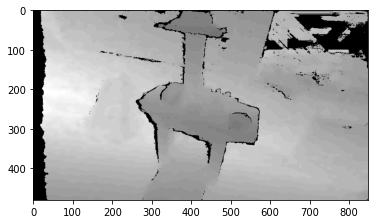

In [56]:
#frame 1
# depth_image = cv2.convertScaleAbs(d435_frame1_data, alpha=0.03)
depth_image = np.asanyarray(depth_frame1.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
plt.imshow(depth_image, cmap='gray')

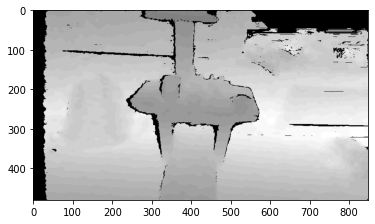

In [57]:
#frame 2
# depth_image = cv2.convertScaleAbs(d435_frame2_data, alpha=0.03)
depth_image = np.asanyarray(depth_frame2.get_data())
depth_image = cv2.convertScaleAbs(depth_image, alpha=0.03)
plt.imshow(depth_image, cmap='gray')

# Transformations

transformation between cameras

$ {}^{T}T_D$ - d435 wrt t265, always the same

In [58]:
T_d_wrt_t = np.array([[0.999968402, -0.006753626, -0.004188075, -0.015890727],
                      [-0.006685408, -0.999848172, 0.016093893, 0.028273059],
                      [-0.004296131, -0.016065384, -0.999861654, -0.009375589],
                      [0, 0, 0, 1]])

In [59]:
def get_transformation(data):
#     data = pose.get_pose_data()
    data_rot = [float(i.strip('xyzw: ')) for i in str(data.rotation).split(', ')]
    r = R.from_quat(data_rot)
    rotation = np.array(r.as_matrix())
    translation = np.array([float(i.strip('xyzw: ')) for i in str(data.translation).split(', ')])[np.newaxis].T
    T = np.hstack((rotation, translation))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

transformation of t265 wrt world

$ {}^{W}T_{T}$

In [60]:
#frame1
T_t1_wrt_w = get_transformation(t265_frame1_data)
T_t1_wrt_w

array([[ 0.9583, -0.2281,  0.1724, -2.6506],
       [ 0.1038,  0.8393,  0.5337,  0.3914],
       [-0.2664, -0.4935,  0.8279, -0.9613],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

In [61]:
#frame2
T_t2_wrt_w = get_transformation(t265_frame2_data)
T_t2_wrt_w

array([[ 0.9969, -0.0675, -0.0393, -2.8294],
       [ 0.0777,  0.8075,  0.5847,  0.3957],
       [-0.0077, -0.5859,  0.8103, -0.933 ],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

transformation of d435 wrt world

$ {}^{W}T_{D1} = {}^{W}T_{T} {}^{T}T_{D1}$

In [62]:
#frame1
T_d1_wrt_w = T_t1_wrt_w @ T_d_wrt_t
T_d1_wrt_w

array([[ 0.959 ,  0.2189, -0.18  , -2.6739],
       [ 0.0959, -0.8484, -0.5206,  0.4085],
       [-0.2667,  0.482 , -0.8346, -0.9788],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

$ {}^{W}T_{D2} = {}^{W}T_{T} {}^{T}T_{D2}$

In [63]:
#frame2
T_d2_wrt_w = T_t2_wrt_w @ T_d_wrt_t
T_d2_wrt_w

array([[ 0.9975,  0.0613,  0.0341, -2.8468],
       [ 0.0698, -0.8173, -0.5719,  0.4118],
       [-0.0072,  0.5729, -0.8196, -0.9571],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

transformation of keyframe2 wrt keyframe1

$ {}^{W}T_{D2} = {}^{W}T_{D1} {}^{D1}T_{D2}$

$ ({}^{W}T_{D1})^{-1} {}^{W}T_{D2} = {}^{D1}T_{D2}$

${}^{D1}T_{D2}$:

In [64]:
# keyframe 2 wtr keyframe 1
T_d2_wrt_d1 = np.linalg.inv(T_d1_wrt_w) @ T_d2_wrt_w
T_d2_wrt_d1

array([[ 0.9653, -0.1723,  0.1964, -0.1712],
       [ 0.1556,  0.983 ,  0.0976, -0.0302],
       [-0.2099, -0.0637,  0.9757,  0.0113],
       [ 0.    ,  0.    ,  0.    ,  1.    ]])

Now let's try to get ${}^{D1}T_{D2}$ from point cloud registration

# Point cloud registration

### Defive PC, init, and max_point_pair_dist

In [65]:
def get_geom_pcl(depth_frame): #slower
    pc = rs.pointcloud()
    points = pc.calculate(depth_frame).as_points()
    coordinates = np.ndarray(buffer=points.get_vertices(), dtype=np.float32, shape=(480, 848, 3)) \
        .reshape((-1, 3))
    coordinates = coordinates[coordinates[:, 2] != 0]
    pcl = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(coordinates))
    return pcl

In [66]:
import copy
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp])

In [74]:
%%time
pcl1 = get_geom_pcl(depth_frame1)
pcl2 = get_geom_pcl(depth_frame2)

CPU times: user 730 ms, sys: 11 ms, total: 741 ms
Wall time: 740 ms


In [68]:
init = T_d2_wrt_d1 # does not help much ?

In [69]:
max_point_pair_dist = 0.02

### Evaliate init guess

In [70]:
evaluation_init = o3d.registration.evaluate_registration(pcl2, pcl1,
                                                    max_point_pair_dist, init)
evaluation_init

registration::RegistrationResult with fitness=7.879186e-01, inlier_rmse=8.365209e-03, and correspondence_set size of 288966
Access transformation to get result.

In [108]:
draw_registration_result(pcl2, pcl1, init)

### Evaluate ICP

#### With $init = Identity$

In [75]:
%%time
T = o3d.registration.registration_icp(pcl2, pcl1, max_point_pair_dist)
T, T.transformation

CPU times: user 1min 4s, sys: 8.87 s, total: 1min 13s
Wall time: 20.5 s


(registration::RegistrationResult with fitness=3.952408e-01, inlier_rmse=9.151465e-03, and correspondence_set size of 144953
 Access transformation to get result.,
 array([[ 0.9993, -0.0345,  0.0135, -0.0092],
        [ 0.034 ,  0.9988,  0.0341,  0.0039],
        [-0.0147, -0.0336,  0.9993,  0.0251],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [76]:
draw_registration_result(pcl2, pcl1, T.transformation)

#### With $init = {}^{D1}T_{D2}$

In [77]:
%%time
T_init = o3d.registration.registration_icp(pcl2, pcl1, max_point_pair_dist, init)
T_init, T_init.transformation

CPU times: user 53.5 s, sys: 9.56 s, total: 1min 3s
Wall time: 18.9 s


(registration::RegistrationResult with fitness=7.982009e-01, inlier_rmse=7.292680e-03, and correspondence_set size of 292737
 Access transformation to get result.,
 array([[ 0.9626, -0.18  ,  0.2023, -0.1749],
        [ 0.1625,  0.9816,  0.1004, -0.0243],
        [-0.2167, -0.0638,  0.9742,  0.0113],
        [ 0.    ,  0.    ,  0.    ,  1.    ]]))

In [78]:
draw_registration_result(pcl2, pcl1, T_init.transformation)

# Results

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


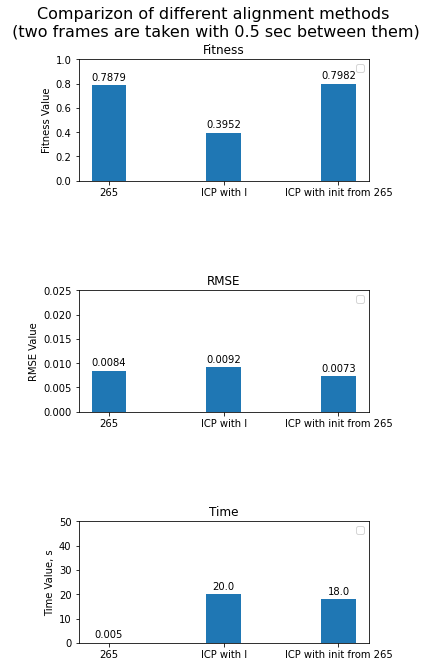

In [80]:
fitness_list =  [evaluation_init.fitness, T.fitness, T_init.fitness ]
rmse_list =  [evaluation_init.inlier_rmse, T.inlier_rmse, T_init.inlier_rmse ]
time_list =  [0.005, 20, 18 ]
labels =  [ '265', 'ICP with I', 'ICP with init from 265']
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, (ax0, ax, ax2) = plt.subplots(3,1)
fig.suptitle('Comparizon of different alignment methods\n (two frames are taken with 0.5 sec between them)\n ', fontsize=16)
rects0 = ax0.bar(x, fitness_list, width)
rects1 = ax.bar(x, rmse_list, width)
rects2 = ax2.bar(x, time_list, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax0.set_ylabel('Fitness Value')
ax0.set_title('Fitness')
ax0.set_xticks(x)
ax0.set_xticklabels(labels)
ax0.legend()
ax0.set_ylim([0,1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0,0.025])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Time Value, s')
ax2.set_title('Time')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.set_ylim([0,50])

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),4)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects0, ax0)
autolabel(rects1, ax)
autolabel(rects2, ax2)

fig.tight_layout()
fig.set_size_inches(5, 10)

plt.show()

In [97]:
from plot.plot_trajectory import plot_trajectory
import time

In [105]:
T_d2_wrt_w[1,-1]

0.4118074216131327

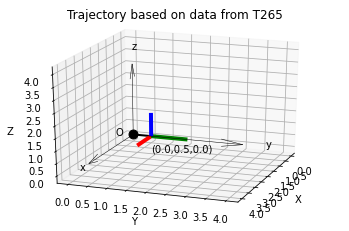

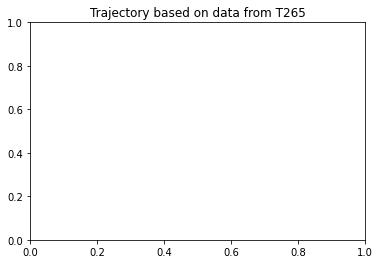

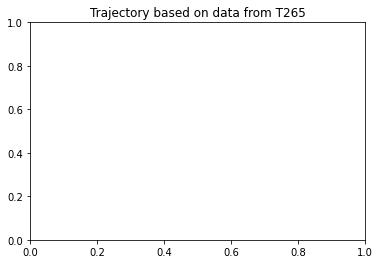

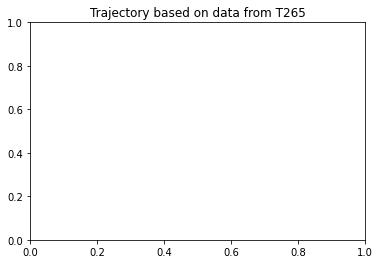

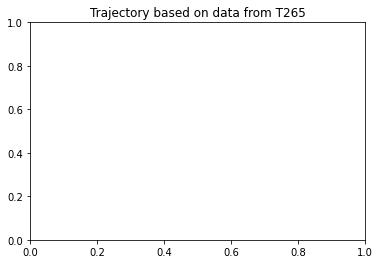

In [116]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
plt.ion()

tm = np.eye(4)
transformation_matrix_set = []
transformation_matrix_set.append(tm)

for _ in range(5):
    tm[1,-1]+=0.5
    transformation_matrix_set.append(tm)
    plot_trajectory(transformation_matrix_set, ax, trajectories=[1])

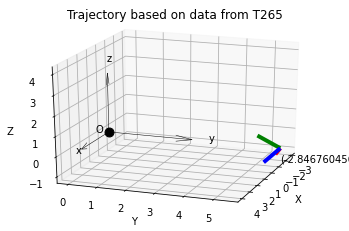

In [ ]:
# rewind
for i in range(frames_between_frames_D435*count_of_frames*2):
    pipe_d435.wait_for_frames()

In [ ]:
d435_frames = []
while len(d435_frames) != count_of_frames:
    for i in range(frames_between_frames_D435):
        depth_frame = pipe_d435.wait_for_frames().get_depth_frame()
    d435_frames.append(depth_frame)

In [ ]:
pose_frame = None
pose_frame_time = -1
thresh = 7
t265_frames = []
t265_frames_temp = []
n = 0

for i, depth_frame in enumerate(d435_frames):
    depth_frame_time = depth_frame.get_timestamp()
    while abs(depth_frame_time-pose_frame_time) > thresh:
        pose_frame = pipe_t265.wait_for_frames().get_pose_frame()
        pose_frame_time = pose_frame.get_timestamp()
    while abs(depth_frame_time-pose_frame_time) <= thresh:
        pose_frame = pipe_t265.wait_for_frames().get_pose_frame()
        t265_frames_temp.append(pose_frame)
        pose_frame_time = pose_frame.get_timestamp()

    min_int_index = 0
    min_interval = thresh * 2
    for ind_pose, temp_pose in enumerate(t265_frames_temp):
        if abs(depth_frame_time-temp_pose.get_timestamp())<min_interval:
            min_interval = abs(depth_frame_time-temp_pose.get_timestamp())
            min_int_index = ind_pose
    t265_frames.append(t265_frames_temp[min_int_index])
    

## Test for frames

In [ ]:
def count_diff_frames(frames):
    prev_frame = None
    for i, frame in enumerate(frames):
        if prev_frame is not None:
            print("Difference bw {0} and {1} frames is {2:.4f} ms".format(i, i-1, frame.get_timestamp()-prev_frame.get_timestamp()))
        prev_frame = frame

In [ ]:
def get_diff_sensors(frames1, frames2):
    if len(frames1) != len(frames2):
        return
    else:
        for i in range(len(frames1)):
            print("Difference bw frames1[{0}] and frames2[{0}] frames is {1:.4f} ms".format(i, frames1[i].get_timestamp()-frames2[i].get_timestamp()))
        

In [ ]:
count_diff_frames(d435_frames)
count_diff_frames(t265_frames)

In [ ]:
get_diff_sensors(d435_frames, t265_frames)

# Analysis

## Helpers

In [ ]:
import time
from functools import wraps

def timing(f):
    @wraps(f)
    def wrap(*args, **kw):
        time_start = time.time()
        result = f(*args, **kw)
        time_end = time.time()
        print('----------func:%r took: %2.4f sec' % (f.__name__, time_end-time_start))
        return result
    return wrap

In [ ]:
tm_T265toD435 = np.array([[0.999968402, -0.006753626, -0.004188075, -0.015890727],
                          [-0.006685408, -0.999848172, 0.016093893, 0.028273059],
                          [-0.004296131, -0.016065384, -0.999861654, -0.009375589],
                          [0, 0, 0, 1]])

In [ ]:
# Graph plot
t265 = np.load('../logs/points_trajectory_T265.npy') #np array coords
d435 = np.load('../logs/points_trajectory_D435.npy')/1 # np array coords
# before = 10
before = d435.shape[0]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(t265[:before, 0], t265[:before, 1], t265[:before, 2], label='t265')
ax.plot(d435[:before, 0], d435[:before, 1], d435[:before, 2], label='d435')
ax.view_init(elev=22, azim=80)
plt.legend()

## Functions

In [ ]:
def get_transformation(pose):
    data = pose.get_pose_data()
    data_rot = [float(i.strip('xyzw: ')) for i in str(data.rotation).split(', ')]
    r = R.from_quat(data_rot)
    rotation = np.array(r.as_matrix())
    translation = np.array([float(i.strip('xyzw: ')) for i in str(data.translation).split(', ')])[np.newaxis].T
    T = np.hstack((rotation, translation))
    T = np.vstack((T, np.array([0, 0, 0, 1])))
    return T

In [ ]:
get_transformation(t265_frames[0])

In [ ]:
def apply_transformation(transformation, points):
    """

    :param transformation: 4x4 np.array
    :param points: Nx3 np.array
    :return: transformed Nx3 np.array
    """
    if transformation is None or points is None:
        return None
    else:
        coordinates = np.hstack((points, np.ones((points.shape[0], 1))))
        return (transformation @ coordinates.T).T[:, :-1]

In [ ]:
def get_coordinates(depth_frame, make_sampling=True, koef = 2**2):
    """
     TODO
    :param make_sampling:
    :return:
    """
    pc = rs.pointcloud()
    if make_sampling:
        decimate = rs.decimation_filter()
        decimate.set_option(rs.option.filter_magnitude, koef)
        depth_frame = decimate.process(depth_frame)

        points = pc.calculate(depth_frame).as_points()
    else:
        points = pc.calculate(depth_frame).as_points()

    coordinates = np.ndarray(buffer=points.get_vertices(), dtype=np.float32, shape=(points.size(), 3))
    coordinates = coordinates[coordinates[:, 2] != 0]

    coordinates = apply_transformation(tm_T265toD435, coordinates)
    return coordinates


In [ ]:
get_coordinates(d435_frames[0]).shape

In [ ]:
def convert_to_pcl(points):
    """
        TODO
    :param points: Nx3
    :return:
    """
    if points is None:
        return None
    else:
        return o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))

In [ ]:
convert_to_pcl(get_coordinates(d435_frames[0]))

In [ ]:
# TODO this 100%

def get_transformation(self, max_point_pair_dist=0.2, init_guess=np.eye(4)):
    old_point_cloud = self.apply_transformation(self.prev_tm, self.point_cloud)
    old_pcl = self.convert_to_pcl(old_point_cloud) # n-1
    self.point_cloud = self.apply_transformation(self.prev_tm, self.get_coordinates())
    if old_pcl is None:
        self.prev_tm = init_guess
        print("\n\n\n{}\n\n\n".format(init_guess))
        return None

    new_pcl = self.convert_to_pcl(self.point_cloud) # n

    tr_mx = o3d.registration.registration_icp(old_pcl, new_pcl, max_point_pair_dist,
                                              self.prev_tm, o3d.registration.TransformationEstimationPointToPoint())\
        .transformation
    self.prev_tm = tr_mx
    return tr_mx